<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Show/Hide Code</a>.

In [41]:
%run "../../shared/utilz_image_proc.ipynb"

## 1. Kernels and Filtering

## ---- Kernelz + Blur filters----


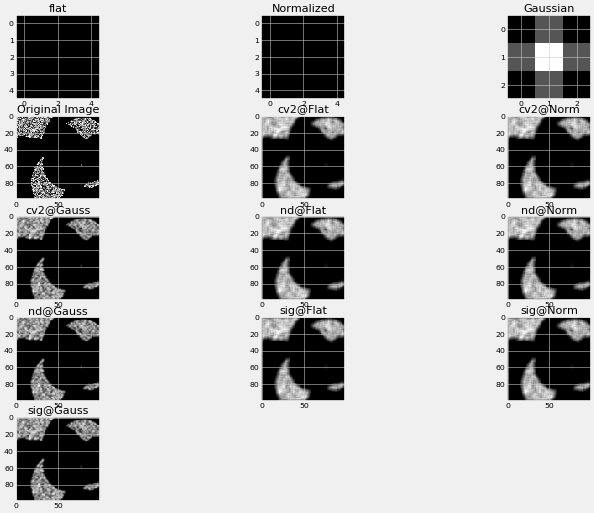

In [48]:
print("## ---- Kernelz + Blur filters----")
## all do pretty much the same thing but this is how to call them 
from scipy.signal import convolve2d
from scipy.ndimage.filters import convolve

ksize = 5
kern = np.ones( (ksize, ksize) ) 
normalized_kern = np.ones( (ksize, ksize) ) / ksize**2
gaus_kern = np.array([
    [1/16, 1/8, 1/16],
    [1/8, 1/4, 1/8],
    [1/16, 1/8, 1/16],
])

# test image
img = np.random.rand( 100, 100) 
dcolor = (0,0,0)
dthick = 15
sfact = 100
rfact = 50
for i in range(10):
    bubble_center = tuple(np.int(x*sfact) for x in np.random.rand( 1,2 )[0] )
#     print( bubble_center)
    bubble_radius = np.random.randint( rfact )
    #skimage.draw.circle( bubble_center[1], bubble_center[0], bubble_radius, shape=img.shape)
    img = cv2.circle( img, bubble_center, bubble_radius, color=dcolor, thickness=dthick)

grid_plot_images([kern, normalized_kern, gaus_kern, img,
                  ## cv2 convolve
                  cv2.filter2D(img, -1, kern, borderType=cv2.BORDER_CONSTANT), ##borderType is padding type
                  cv2.filter2D(img, -1, normalized_kern, borderType=cv2.BORDER_CONSTANT), 
                  cv2.filter2D(img, -1, gaus_kern, borderType=cv2.BORDER_CONSTANT), 
                                    
                  ## ndimage convolve
                  convolve(img, kern, mode='constant', cval=0.0),
                  convolve(img, normalized_kern, mode='constant', cval=0.0),
                  convolve(img, gaus_kern, mode='constant', cval=0.0),
                  
                  ## scipy.signal convolve
                  convolve2d(img, kern, mode='same'),
                  convolve2d(img, normalized_kern, mode='same'),
                  convolve2d(img, gaus_kern, mode='same'),
                  
                 ], 
                 [ "flat","Normalized", "Gaussian", "Original Image", 
                  "cv2@Flat", "cv2@Norm", "cv2@Gauss",
                   "nd@Flat", "nd@Norm", "nd@Gauss",
                   "sig@Flat", "sig@Norm", "sig@Gauss"
                 ], 
                 nc=3, logit=False)

## 2. Fourier Transform